In [1]:
import pandas as pd

In [2]:
path = path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import Ridge

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
import matplotlib.pyplot as plt

In [10]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']]

In [11]:
Y = df[['price']]

In [12]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [17]:
poly = PolynomialFeatures(degree = 2)

In [18]:
train_x_pr = poly.fit_transform(train_x)

In [19]:
test_x_pr = poly.fit_transform(test_x)

In [20]:
rm = Ridge(alpha = 0.1)

In [21]:
rm.fit(train_x_pr,train_y)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.832969e-17
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
pred = rm.predict(test_x_pr)

In [26]:
import numpy as np

In [29]:
alfa = 5000*np.arange(0,20000)

In [30]:
train_r2 = []
test_r2 = []

In [31]:
for i in alfa:
    rm = Ridge(alpha = i)
    rm.fit(train_x_pr,train_y)
    train_r2.append(rm.score(train_x_pr,train_y))
    test_r2.append(rm.score(test_x_pr,test_y))

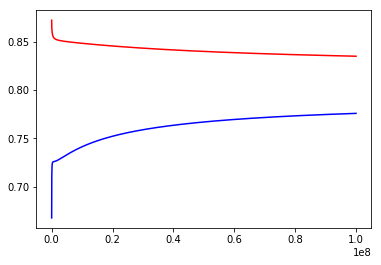

In [33]:
plt.plot(alfa,train_r2,'r')
plt.plot(alfa,test_r2,'b')